# Trilib
    
    Trilib stations are recycling garbage bins distributed around some Districts in Paris.
    They divide waste into three types of materials: Plastic and cans, Cardboard, Glass
    This code maps the distribution of these bins as per their amounts and their filling rate.
    It then maps them accross Paris

Needed to run 'Trilib'

1- Libraries: (make sure to install geopandas, shapely and descartes)
    - Numpy
    - Pandas
    - Seaborn
    - Matplotlib
    - Geopandas
    - Shapely
    - Descartes
   
2- Files: (availiable in the zip)
    - trilib.csv
    - quartier_paris.geojson

In [1]:
#Let's import everything we need
import requests
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
#And the Data
trilib_df = pd.read_csv ('trilib.csv', sep=';')
trilib_df

,fillingLimit,name,avgFillingRatePerDay,fillingRate,serialNumber,collectFrequency,fillingRateDate,localisationfo_streetbis,localisationfo_town,localisationfo_name,...,localisationfo_number,localisationfo_street,localisationfo_postalcode,wastecontainermodelfo_usefulcapacity,wastecontainermodelfo_model,wastecontainermodelfo_type,wastecontainermodelfo_manufacturer,wastetype_designation,wastetype_density,geo
0,100,19027-PM 001,15,24,19027-PM 001,c400,2019-10-17T21:00:00+02:00,NaN,Paris,19027,...,19027,"223, Rue de Crimée",75019,770,Modèle 770L TRILIB (1220),aerial,PLASTIC OMNIUM,Can / Plastic,0.04,"48.8926379636,2.3745874688"
1,100,19039-PM 002,9,26,19039-PM 002,c400,2019-10-17T21:00:00+02:00,NaN,Paris,19039,...,19039,"7, Quai de la Seine",75019,770,Modèle 770L TRILIB (1180),aerial,PLASTIC OMNIUM,Can / Plastic,0.04,"48.884586,2.370094"
2,100,13010-P 001,0,60,13010-P 001,c400,2019-10-17T21:00:00+02:00,NaN,Paris,13010,...,13010,"92, Boulevard de Masséna",75013,770,Modèle 770L TRILIB (1220),aerial,PLASTIC OMNIUM,CB,0.20,"48.821162,2.367852"
3,100,13014-PM 003,8,0,13014-PM 003,c400,2019-10-17T12:00:00+02:00,NaN,Paris,13014,...,13014,"62, Rue Nationale",75013,770,Modèle 770L TRILIB (1220),aerial,PLASTIC OMNIUM,Can / Plastic,0.04,"48.82583,2.367423"
4,100,18018-PM 001,18,51,18018-PM 001,c400,2019-10-17T21:00:00+02:00,NaN,Paris,18018,...,18018,"17, Rue de Torcy",75018,770,Modèle 770L TRILIB (1210),aerial,PLASTIC OMNIUM,Can / Plastic,0.04,"48.891197,2.363573"
5,100,18020-V 001,6,30,18020-V 001,c300,2019-10-17T21:00:00+02:00,NaN,Paris,18020,...,18020,"45, Rue Léon",75018,500,Modèle 500L TRILIB (1180),aerial,PLASTIC OMNIUM,Glass,0.30,"48.8892,2.353578"
6,100,19031-V 001,2,42,19031-V 001,c300,2019-10-17T21:00:00+02:00,NaN,Paris,19031,...,19031,"12, Avenue Ambroise Rendu",75019,500,Modèle 500L TRILIB (1180),aerial,PLASTIC OMNIUM,Glass,0.30,"48.885009,2.396018"
7,100,19035-P 001,22,86,19035-P 001,c400,2019-10-17T12:00:00+02:00,NaN,Paris,19035,...,19035,"28, Rue Miguel Hidalgo",75019,770,Modèle 770L TRILIB (1190),aerial,PLASTIC OMNIUM,CB,0.20,"48.881214,2.391031"
8,100,2004-PM 001,4,16,2004-PM 001,c400,2019-10-17T12:00:00+02:00,NaN,Paris,2004,...,2004,"1, Rue de la Lune",75002,770,Modèle 770L TRILIB (1170),aerial,PLASTIC OMNIUM,Can / Plastic,0.04,"48.869787,2.351599"
9,100,18017-V 001,1,28,18017-V 001,c300,2019-10-17T21:00:00+02:00,NaN,Paris,18017,...,18017,"12, Rue Ordener",75018,500,Modèle 500L TRILIB (1220),aerial,PLASTIC OMNIUM,Glass,0.30,"48.890392,2.358258"


In [3]:
#We pick the data we want to map and organize it
trilib = DataFrame(trilib_df, columns=['localisationfo_postalcode','wastetype_designation','fillingRate'])
trilib = trilib.rename(columns = {'localisationfo_postalcode':'Arrondissement','wastetype_designation':'Material','fillingRate':'Fill_Rate'})
trilib_df = trilib_df.replace(to_replace='CB',value='Cardboard')
trilib.head()

,Arrondissement,Material,Fill_Rate
0,75019,Can / Plastic,24
1,75019,Can / Plastic,26
2,75013,CB,60
3,75013,Can / Plastic,0
4,75018,Can / Plastic,51


In [4]:
#We create a column to be able to count the number of bins 
DataFrame(trilib,columns=['Arrondissement','Material','count','Fill_Rate','Coordinates'])
trilib['Count']=1
trilib.head(9)

,Arrondissement,Material,Fill_Rate,Count
0,75019,Can / Plastic,24,1
1,75019,Can / Plastic,26,1
2,75013,CB,60,1
3,75013,Can / Plastic,0,1
4,75018,Can / Plastic,51,1
5,75018,Glass,30,1
6,75019,Glass,42,1
7,75019,CB,86,1
8,75002,Can / Plastic,16,1


In [5]:
#We now can know the number of bins of each sorting material in every Arrondissement of Paris
trilib_count = trilib[['Arrondissement','Material','Count']]
trilib_count = trilib.groupby(['Arrondissement','Material'])['Count'].count().reset_index()
trilib_count.head(9)

,Arrondissement,Material,Count
0,75002,CB,6
1,75002,Can / Plastic,6
2,75002,Glass,4
3,75013,CB,8
4,75013,Can / Plastic,10
5,75013,Glass,7
6,75018,CB,10
7,75018,Can / Plastic,10
8,75018,Glass,10


In [6]:
#We calculate the average filling rate as per sorting material in every Arrondissement
trilib_Avg = trilib.groupby(['Arrondissement','Material'])['Fill_Rate'].mean().reset_index()
trilib_Avg

,Arrondissement,Material,Fill_Rate
0,75002,CB,37.833333
1,75002,Can / Plastic,50.666667
2,75002,Glass,37.750000
3,75013,CB,37.750000
4,75013,Can / Plastic,48.100000
5,75013,Glass,38.285714
6,75018,CB,36.600000
7,75018,Can / Plastic,48.800000
8,75018,Glass,40.600000
9,75019,CB,47.187500


In [7]:
#We merge both columns (number of bins and their average filling rate) in one DataFrame
trilib_Avg_clm = trilib_Avg[trilib_Avg.columns[len(trilib_Avg.columns)-1]]
Trilib = pd.concat([trilib_count, trilib_Avg_clm], axis=1, join='inner')
Trilib

,Arrondissement,Material,Count,Fill_Rate
0,75002,CB,6,37.833333
1,75002,Can / Plastic,6,50.666667
2,75002,Glass,4,37.750000
3,75013,CB,8,37.750000
4,75013,Can / Plastic,10,48.100000
5,75013,Glass,7,38.285714
6,75018,CB,10,36.600000
7,75018,Can / Plastic,10,48.800000
8,75018,Glass,10,40.600000
9,75019,CB,16,47.187500


# Let's visualize some DATA

- First: sorted by Arrondissement: 

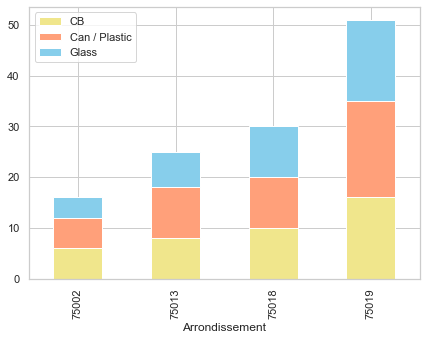

In [8]:
#The following graph shows both the number of bins and their proportion by material    
    
fig, ax = plt.subplots(figsize=(7,5))

Material = Trilib['Material'].drop_duplicates()
margin_bottom = np.zeros(len(Trilib['Arrondissement'].drop_duplicates()))
palette = ['khaki','lightsalmon','skyblue']

for num, Material in enumerate(Material):
   values = list(Trilib[Trilib['Material'] == Material].loc[:,'Count'])
   Trilib[Trilib['Material'] == Material].plot.bar(x='Arrondissement',y='Count', ax=ax, stacked=True,
                                                          bottom=margin_bottom, color=palette[num],label=Material)
   margin_bottom += values

plt.show()

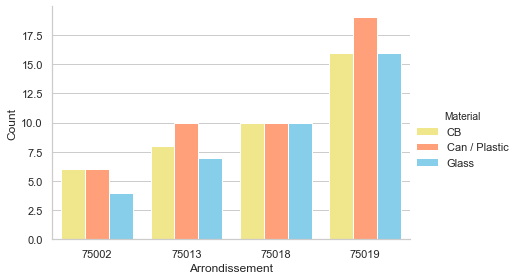

In [9]:
#This one seperates them to show the number of bins of each material
sns.catplot(x="Arrondissement", y="Count",hue="Material",data=Trilib,
            kind="bar",height=4, aspect=1.5, palette=palette, saturation=1)

sns.catplot(x="Arrondissement", y="Count",hue="Material",data=Trilib,kind="bar",height=4, aspect=1.5)

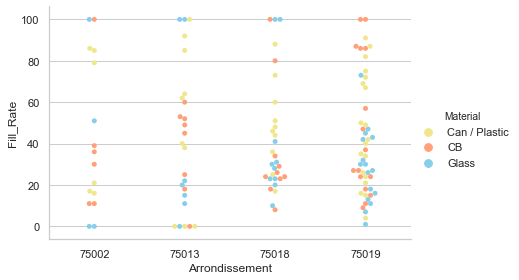

In [10]:
#We now want to see the filling rate of every bin (so we go back to the original DataFrame before the grouping)
sns.catplot( x="Arrondissement", y="Fill_Rate", hue="Material",data=trilib,kind="swarm",height=4, aspect=1.5, palette=palette)

- Second: sorted by Material

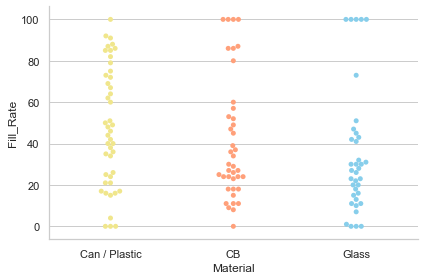

In [11]:
#filling rate of every bin
sns.catplot( x="Material", y="Fill_Rate", hue="Material",data=trilib,kind="swarm",height=4, aspect=1.5, palette=palette)

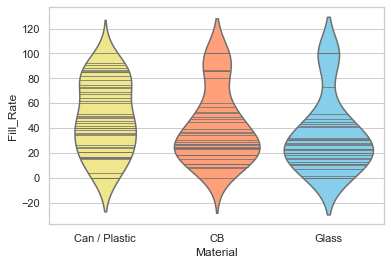

In [12]:
#Same data as above but showing an overall distribution of the filling rate
trilib_Material= sns.violinplot(x="Material", y="Fill_Rate",data=trilib, inner='stick', height=4, aspect=1.5, palette=palette, saturation=1)

# Geographical distribution of the Trilib Bins
We want to extract the location properties of the bins and project them on a map

    1- We will get a map of Paris and fix it
    2- We will project the trilib bins on the map
    3- We will compare the quantities of bins per district of Paris
    4- We will compare the quantities of bins of the different materials
    

1. Let's thus first get a Map!

In [13]:
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.cm as cm

In [14]:
#We import a geodataframe of Paris
Paris = gpd.read_file("quartier_paris.geojson")
Paris.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000047,6155.005036,29,6154.591387,47,1.902932e+06,750000012,7511203,Bercy,12,"POLYGON ((2.39114 48.82611, 2.39026 48.82573, ..."
1,750000001,5057.549475,41,5057.332772,1,8.690007e+05,750000001,7510101,St-Germain-l'Auxerrois,1,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
2,750000076,4435.273252,79,4435.143641,76,1.294988e+06,750000019,7511904,Combat,19,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ..."
3,750000065,5264.597082,68,5264.463406,65,1.465071e+06,750000017,7511701,Ternes,17,"POLYGON ((2.29504 48.87378, 2.29504 48.87378, ..."
4,750000010,2139.625388,50,2139.535591,10,2.717503e+05,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.36710 48.86163, 2.36727 48.86095, ..."


In [15]:
#We organize it
Paris = GeoDataFrame(Paris, columns=['c_ar','c_qu','geometry'])
Paris = Paris.rename(columns = {'c_ar':'arrondissement','c_qu':'district'})
Paris.head(9)

,arrondissement,district,geometry
0,12,47,"POLYGON ((2.39114 48.82611, 2.39026 48.82573, ..."
1,1,1,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
2,19,76,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ..."
3,17,65,"POLYGON ((2.29504 48.87378, 2.29504 48.87378, ..."
4,3,10,"POLYGON ((2.36710 48.86163, 2.36727 48.86095, ..."
5,4,16,"POLYGON ((2.36131 48.84858, 2.36151 48.84823, ..."
6,5,18,"POLYGON ((2.36456 48.84366, 2.36450 48.84358, ..."
7,7,25,"POLYGON ((2.32213 48.84925, 2.32054 48.84842, ..."
8,9,35,"POLYGON ((2.34026 48.87660, 2.34228 48.87651, ..."


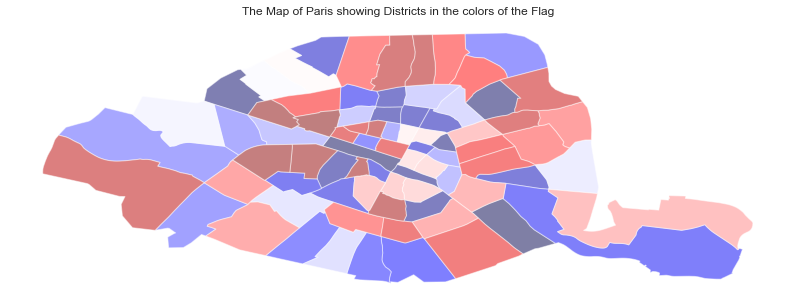

In [16]:
#This is Paris, subdivided into districts
fig, ax = plt.subplots(figsize=(14,6))
ax.axis('off')
plt.title('The Map of Paris showing Districts in the colors of the Flag')
Paris.plot(cmap='seismic', alpha = 0.5, ax=ax)

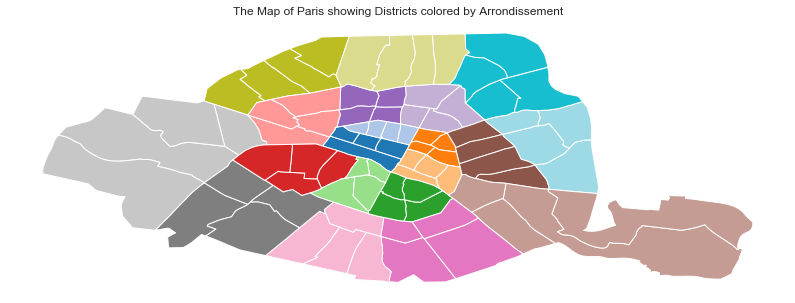

In [17]:
#joining the districts in arrondissements by color coding
fig, ax = plt.subplots(figsize=(14,6))
ax.axis('off')
plt.title('The Map of Paris showing Districts colored by Arrondissement')
Paris.plot(column='arrondissement', categorical=True, cmap='tab20', ax=ax)

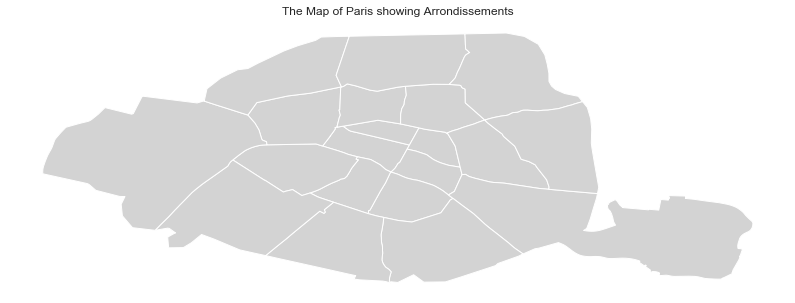

In [18]:
#I can also merge the district geometries into arrondissements
Paris_Arr = GeoDataFrame(Paris, columns=['arrondissement','geometry'])
Paris_Arr = Paris_Arr.dissolve(by='arrondissement').reset_index()

fig, ax = plt.subplots(figsize=(14,6))
ax.axis('off')
plt.title('The Map of Paris showing Arrondissements')
Paris_Arr.plot(ax=ax, facecolor='lightgrey')

In [19]:
#Let's number them! 

#First, I get the centerpoint of each geometry in order to project a number on it
Paris_Arr['center'] = Paris_Arr['geometry'].centroid
Arr_Points = Paris_Arr.copy()
Arr_Points.set_geometry('center',inplace=True)
Arr_Points.head()

,arrondissement,geometry,center
0,1,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...",POINT (2.33644 48.86256)
1,2,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",POINT (2.34280 48.86828)
2,3,"POLYGON ((2.36848 48.85583, 2.36851 48.85573, ...",POINT (2.36000 48.86287)
3,4,"POLYGON ((2.36851 48.85573, 2.36900 48.85374, ...",POINT (2.35763 48.85434)
4,5,"POLYGON ((2.36456 48.84366, 2.36450 48.84358, ...",POINT (2.35071 48.84444)


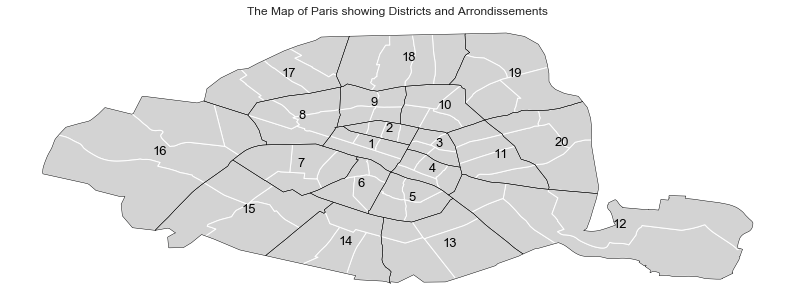

In [20]:
#We can now create an overlay of the districts and the numbered arrondissements
from geopandas import overlay
Paris1= overlay(Paris,Paris_Arr, how='union')

ax = Paris1.plot(figsize=(14,6))
ax.axis('off')
plt.title('The Map of Paris showing Districts and Arrondissements')

texts = []
for x, y, label in zip(Arr_Points.geometry.x, Arr_Points.geometry.y, Arr_Points['arrondissement']):
    texts.append(plt.text(x,y,label,fontsize=13, color='black'))

Paris.plot(ax=ax, facecolor='lightgrey', linewidth=1)
Paris_Arr.plot(ax=ax, facecolor='none', linewidth=.5,edgecolor='black')

2- Now Let's map the Trilib bins!

In [21]:
#We get the coordinates from the original dataframe and seperate them into longitude and latitude
trilib_coo = trilib_df.geo
trilib_coo = trilib_coo.str.split(',', expand=True)
trilib_coo = trilib_coo.rename(columns = {0:'Latitude',1:'Longitude'})
trilib_coo = trilib_coo.astype(float)
trilib_coo.head()

,Latitude,Longitude
0,48.892638,2.374587
1,48.884586,2.370094
2,48.821162,2.367852
3,48.825830,2.367423
4,48.891197,2.363573


In [22]:
#Extract the other information relative to localisation
trilib_geo = DataFrame(trilib_df, columns=['localisationfo_town','localisationfo_street','localisationfo_postalcode','wastetype_designation'])

#Merge all
trilib_geo = pd.concat([trilib_geo, trilib_coo], axis=1, join='inner')
trilib_geo = trilib_geo.rename(columns = {'localisationfo_town':'City', 'localisationfo_street':'Street', 'localisationfo_postalcode':'Arrondissement', 'wastetype_designation':'Material'})
trilib_geo.head()         

,City,Street,Arrondissement,Material,Latitude,Longitude
0,Paris,"223, Rue de Crimée",75019,Can / Plastic,48.892638,2.374587
1,Paris,"7, Quai de la Seine",75019,Can / Plastic,48.884586,2.370094
2,Paris,"92, Boulevard de Masséna",75013,Cardboard,48.821162,2.367852
3,Paris,"62, Rue Nationale",75013,Can / Plastic,48.825830,2.367423
4,Paris,"17, Rue de Torcy",75018,Can / Plastic,48.891197,2.363573


In [23]:
#this is a convention for plotting with geographic coordinates
crs = {'init', 'epsg:4326'}

In [24]:
#We're creating xy coordinates from longitude and latitude
geometry = [Point(xy) for xy in zip (trilib_geo['Longitude'], trilib_geo['Latitude'])]

trilib_geo = GeoDataFrame(trilib_geo, crs = crs, geometry = geometry)
trilib_geo.head()

,City,Street,Arrondissement,Material,Latitude,Longitude,geometry
0,Paris,"223, Rue de Crimée",75019,Can / Plastic,48.892638,2.374587,POINT (2.37459 48.89264)
1,Paris,"7, Quai de la Seine",75019,Can / Plastic,48.884586,2.370094,POINT (2.37009 48.88459)
2,Paris,"92, Boulevard de Masséna",75013,Cardboard,48.821162,2.367852,POINT (2.36785 48.82116)
3,Paris,"62, Rue Nationale",75013,Can / Plastic,48.825830,2.367423,POINT (2.36742 48.82583)
4,Paris,"17, Rue de Torcy",75018,Can / Plastic,48.891197,2.363573,POINT (2.36357 48.89120)


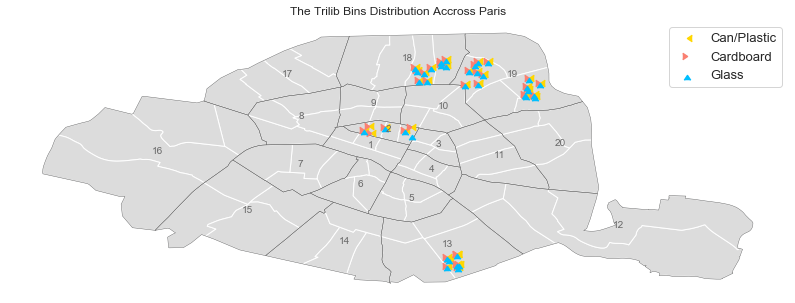

In [25]:
#We project the location of the different bins on the map of paris
ax = Paris1.plot(figsize=(14,6))
ax.axis('off')
plt.title('The Trilib Bins Distribution Accross Paris')

texts = []
for x, y, label in zip(Arr_Points.geometry.x, Arr_Points.geometry.y, Arr_Points['arrondissement']):
    texts.append(plt.text(x,y,label,fontsize=10, color='dimgray'))
    
Paris.plot(ax=ax, facecolor='gainsboro', linewidth=1)
Paris_Arr.plot(ax=ax, facecolor='none', linewidth=.5,edgecolor='dimgray')

trilib_geo[trilib_geo['Material'] == 'Can / Plastic'].plot(ax=ax, markersize=40, color='gold', marker=4, label='Can/Plastic')
trilib_geo[trilib_geo['Material'] == 'Cardboard'].plot(ax=ax, markersize=40, color='salmon', marker=5, label='Cardboard')
trilib_geo[trilib_geo['Material'] =='Glass'].plot(ax=ax, markersize=40, color='deepskyblue', marker=6, label='Glass')
plt.legend(prop={'size':13})

3- Let's compare the quantity of bins per District

In [40]:
#We need to find the district of each Bin (from the location of its point)
Paris2 = gpd.sjoin(trilib_geo, Paris[['district','geometry']].copy(), op='within')
Paris2.head()

D:\Applications\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'epsg:4326', 'init'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


,City,Street,Arrondissement,Material,Latitude,Longitude,geometry,index_right,district
0,Paris,"223, Rue de Crimée",75019,Can / Plastic,48.892638,2.374587,POINT (2.37459 48.89264),59,73
1,Paris,"7, Quai de la Seine",75019,Can / Plastic,48.884586,2.370094,POINT (2.37009 48.88459),59,73
10,Paris,"75, Avenue de Flandres",75019,Cardboard,48.889013,2.374225,POINT (2.37423 48.88901),59,73
16,Paris,"46, Rue Riquet",75019,Cardboard,48.889290,2.371390,POINT (2.37139 48.88929),59,73
17,Paris,"46, Rue Riquet",75019,Glass,48.889290,2.371390,POINT (2.37139 48.88929),59,73


In [27]:
#We check how many bins per District
counts = Paris2.groupby('district').size()
Paris_Distr = Paris.merge(counts.reset_index(name='Count'))
Paris_Distr

,arrondissement,district,geometry,Count
0,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",3
1,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",6
2,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",12
3,19,73,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",27
4,13,50,"POLYGON ((2.36771 48.81742, 2.36696 48.81719, ...",25
5,2,5,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",3
6,19,75,"POLYGON ((2.40940 48.88019, 2.40995 48.87952, ...",24
7,18,71,"POLYGON ((2.34967 48.88374, 2.34951 48.88373, ...",18
8,2,6,"POLYGON ((2.34123 48.86580, 2.34118 48.86575, ...",4


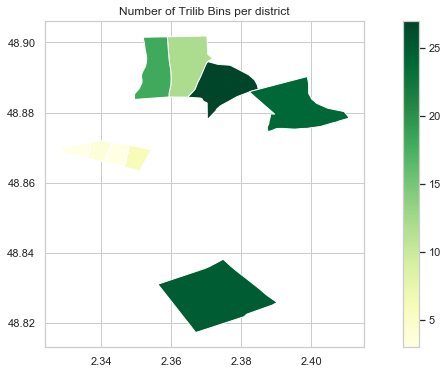

In [28]:
#We color code the districts by the number of bins in each
Paris_Distr.plot(column='Count',cmap='YlGn', figsize=(14, 6), legend=True)
plt.title('Number of Trilib Bins per district')
ax.set_axis_off()

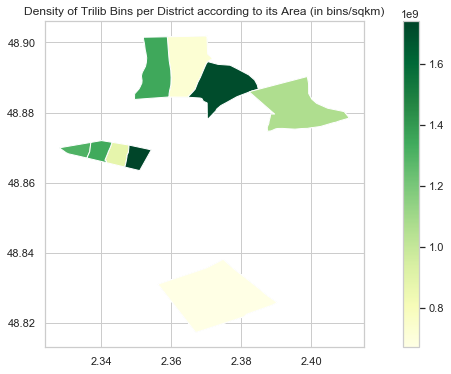

In [29]:
#The area of each district matters. We should then get the density of these bins (from the number of bins in relation to the area)
Paris_Distr['Relative_Count'] = (Paris_Distr['Count']) / (Paris_Distr.geometry.area)*10000

ax = Paris_Distr.plot(figsize=(14,6))
plt.title("Density of Trilib Bins per District according to its Area (in bins/sqkm)")
Paris_Distr.plot(ax=ax, column='Relative_Count',cmap='YlGn', legend=True)

In [30]:
#We can overlay both data (number of bins and their density) by coloring by density and printing the number

#Let's first get the centroid of each district 
Paris_Distr['center'] = Paris_Distr['geometry'].centroid
Distr_Points = Paris_Distr.copy()
Distr_Points.set_geometry('center',inplace=True)
Distr_Points.head()

,arrondissement,district,geometry,Count,Relative_Count,center
0,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",3,8.798116e+08,POINT (2.34470 48.86801)
1,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",6,1.738978e+09,POINT (2.35008 48.86715)
2,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",12,7.260504e+08,POINT (2.36439 48.89401)
3,19,73,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",27,1.712387e+09,POINT (2.37447 48.88766)
4,13,50,"POLYGON ((2.36771 48.81742, 2.36696 48.81719, ...",25,6.703891e+08,POINT (2.37240 48.82753)


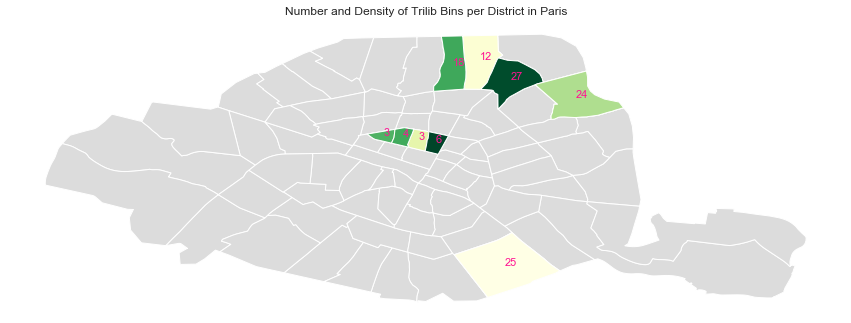

In [31]:
#We overlay the data on the overall map of Paris
ax = Paris.plot(linewidth=1, color='gainsboro', figsize=(15, 6))
plt.title('Number and Density of Trilib Bins per District in Paris')
Paris_Distr.plot(ax=ax,column='Relative_Count',cmap='YlGn',figsize=(14, 6), legend=False)

texts = []
for x, y, label in zip(Distr_Points.geometry.x, Distr_Points.geometry.y, Distr_Points['Count']):
    texts.append(plt.text(x,y,label,fontsize=11, color='deeppink'))
ax.set_axis_off()

4- Let's compare the density of bins per materials

    Here we subdivide our dataframe into 3 dataframes (one for each Material), then we map them in each disrict

In [32]:
#We start by counting the number of bins of every material in every district
counts = Paris2.groupby(['district','Material']).size()
Paris_Distr = Paris.merge(counts.reset_index(name='Material_Count'))
Paris_Distr.head(8)

,arrondissement,district,geometry,Material,Material_Count
0,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",Can / Plastic,1
1,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",Cardboard,1
2,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",Glass,1
3,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",Can / Plastic,2
4,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",Cardboard,2
5,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",Glass,2
6,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",Can / Plastic,4
7,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",Cardboard,4


In [33]:
#disabling chain assignment for the following
pd.options.mode.chained_assignment = None

In [34]:
#We extract the Can and Plastic bins
Paris_Can_Plastic = Paris_Distr[Paris_Distr['Material'].str.contains("Can / Plastic")]
Paris_Can_Plastic

,arrondissement,district,geometry,Material,Material_Count
0,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",Can / Plastic,1
3,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",Can / Plastic,2
6,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",Can / Plastic,4
9,19,73,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",Can / Plastic,11
12,13,50,"POLYGON ((2.36771 48.81742, 2.36696 48.81719, ...",Can / Plastic,10
15,2,5,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",Can / Plastic,1
18,19,75,"POLYGON ((2.40940 48.88019, 2.40995 48.87952, ...",Can / Plastic,8
21,18,71,"POLYGON ((2.34967 48.88374, 2.34951 48.88373, ...",Can / Plastic,6
24,2,6,"POLYGON ((2.34123 48.86580, 2.34118 48.86575, ...",Can / Plastic,2


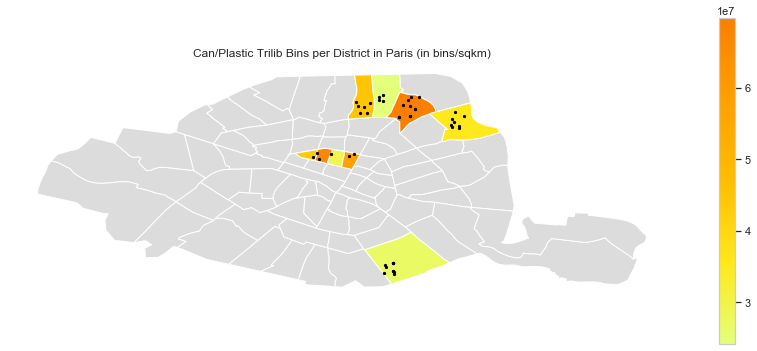

In [35]:
#We would like to show the density of the bins in relation to the district area
Paris_Can_Plastic['Relative_Count'] = (Paris_Can_Plastic['Material_Count']) / (Paris_Can_Plastic.geometry.area)*1000

ax = Paris.plot(linewidth=1, color='gainsboro', figsize=(15, 6))
plt.title("Can/Plastic Trilib Bins per District in Paris (in bins/sqkm)")
Paris_Can_Plastic.plot(ax=ax, column='Relative_Count',cmap='Wistia', legend=True)

#We overlay the bin themselves (so we can also count them)
trilib_geo[trilib_geo['Material'] == 'Can / Plastic'].plot(ax=ax, markersize=20, color='black', marker='.', label='Can/Plastic')

ax.set_axis_off()

In [36]:
#We extract the Cardboard bins
Paris_Cardboard = Paris_Distr[Paris_Distr['Material'].str.contains("Cardboard")]
Paris_Cardboard

,arrondissement,district,geometry,Material,Material_Count
1,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",Cardboard,1
4,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",Cardboard,2
7,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",Cardboard,4
10,19,73,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",Cardboard,8
13,13,50,"POLYGON ((2.36771 48.81742, 2.36696 48.81719, ...",Cardboard,8
16,2,5,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",Cardboard,1
19,19,75,"POLYGON ((2.40940 48.88019, 2.40995 48.87952, ...",Cardboard,8
22,18,71,"POLYGON ((2.34967 48.88374, 2.34951 48.88373, ...",Cardboard,6
25,2,6,"POLYGON ((2.34123 48.86580, 2.34118 48.86575, ...",Cardboard,2


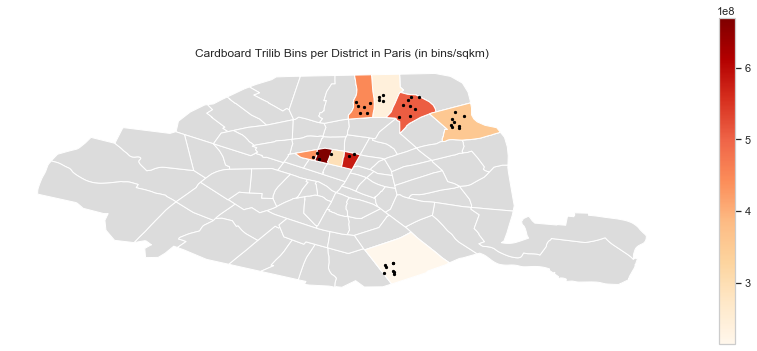

In [37]:
#We would like to show the density of the bins in relation to the district area
Paris_Cardboard['Relative_Count'] = (Paris_Cardboard['Material_Count']) / (Paris_Cardboard.geometry.area)*10000

ax = Paris.plot(linewidth=1, color='gainsboro', figsize=(15, 6))
plt.title("Cardboard Trilib Bins per District in Paris (in bins/sqkm)")
Paris_Cardboard.plot(ax=ax, column='Relative_Count',cmap='OrRd',legend=True)

#We overlay the bin themselves (so we can also count them)
trilib_geo[trilib_geo['Material'] == 'Cardboard'].plot(ax=ax, markersize=20, color='black', marker='.', label='Cardboard')

ax.set_axis_off()

In [38]:
#We extract the Glass bins
Paris_Glass = Paris_Distr[Paris_Distr['Material'].str.contains("Glass")]
Paris_Glass

,arrondissement,district,geometry,Material,Material_Count
2,2,7,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",Glass,1
5,2,8,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",Glass,2
8,18,72,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",Glass,4
11,19,73,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",Glass,8
14,13,50,"POLYGON ((2.36771 48.81742, 2.36696 48.81719, ...",Glass,7
17,2,5,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",Glass,1
20,19,75,"POLYGON ((2.40940 48.88019, 2.40995 48.87952, ...",Glass,8
23,18,71,"POLYGON ((2.34967 48.88374, 2.34951 48.88373, ...",Glass,6


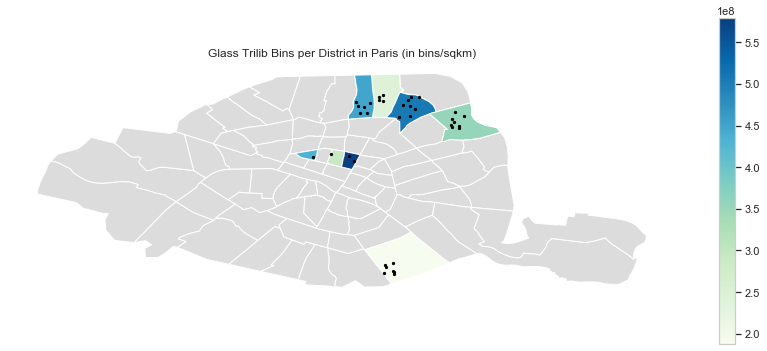

In [39]:
#We would like to show the density of the bins in relation to the district area
Paris_Glass['Relative_Count'] = (Paris_Glass['Material_Count']) / (Paris_Glass.geometry.area)*10000

ax = Paris.plot(linewidth=1, color='gainsboro', figsize=(15, 6))
plt.title("Glass Trilib Bins per District in Paris (in bins/sqkm)")
Paris_Glass.plot(ax=ax, column='Relative_Count',cmap='GnBu',legend=True)

#We overlay the bin themselves (so we can also count them)
trilib_geo[trilib_geo['Material'] == 'Glass'].plot(ax=ax, markersize=20, color='black', marker='.', label='Glass')

ax.set_axis_off()

# That's All
Enjoy Aldo!